# Regression – Prediction of Emporium Sales


### Problem Statement:
As the success of the  store depends upon its sales. More the sales made more is the revenue.
The Emporium has several outlets we need to predict the sales which they can expect.

### Application of predicting the sales:
Objective: Build a model which predicts sales based on various factors of emporium and products.

This helps the sales team to understand the best and worst-selling products and products to promote

Finding the best-suited model

Helpful for marketing team to build strategy to improve revenue

### Business Objective
Build a model to predict the Sales of a store

### Data Dictionary


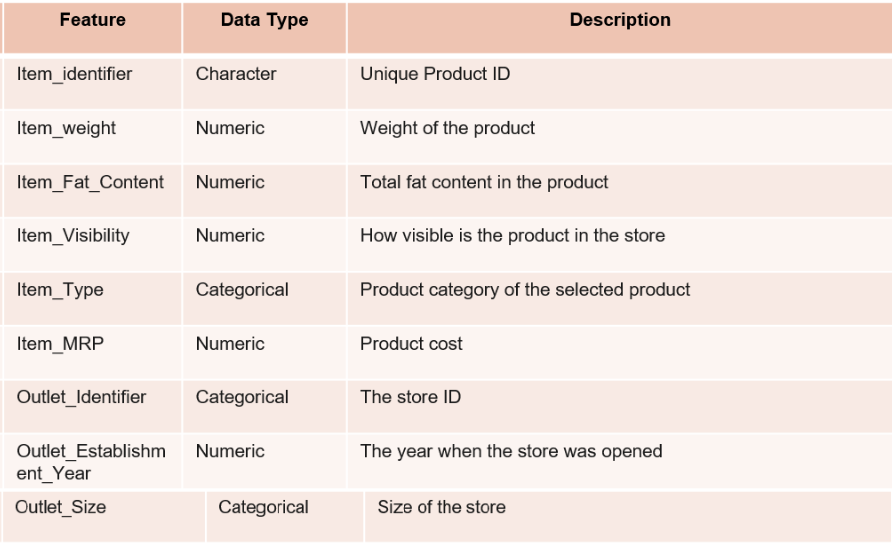


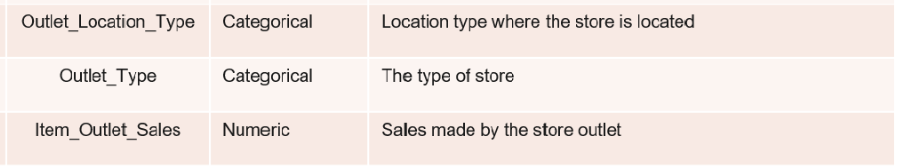

## Import Modules

In [2]:
# importing libraries
import numpy as np                                               # for numerical operations
import pandas as pd            
import matplotlib.pyplot as plt                                  # for visualisation
import seaborn as sns                                            # for visualisation                              
from sklearn import preprocessing                                # for preprocessing the data
from sklearn.preprocessing import MinMaxScaler                   # for scaling the data to make in one range
from sklearn.model_selection import train_test_split             # for splitting the data into train and test set
from sklearn.tree import DecisionTreeRegressor                   # for model building
from sklearn.linear_model import LinearRegression                # for model building
from sklearn.ensemble import AdaBoostRegressor                   # for model building
from sklearn.neighbors import KNeighborsRegressor                # for model building                                      # for model building
from sklearn.metrics import mean_squared_error                   # for evaluating the model
import warnings                                                  # to remove warnings
warnings.simplefilter(action='ignore')                    
from sklearn.model_selection import KFold                        # for cross validation 
from sklearn.model_selection import cross_val_score              # for evaluation of model
from sklearn.model_selection import cross_val_predict            # for predicting values
import sklearn                                                   # for checking scroing keywords
from numpy import mean                                           # for finding mean values

## Loading the dataset

In [3]:
# Loading data file
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Emporium-Sales-Prediction-main\\Emporium-Sales-Prediction-main\\sale.csv")

# preview the data file
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Preprocessing the dataset

In [4]:
# structure of data
print('Shape of data is',df.shape)

Shape of data is (14204, 12)


In [5]:
# summary of dataset
print('Statistical description of dataset are as follows :')
df.describe()

Statistical description of dataset are as follows :


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# for finding null values count
print('Count of null values of all the features is as follows :')
df.isnull().sum()

Count of null values of all the features is as follows :


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [10]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7884
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [11]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)

# removing large unique element values attributes 
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

# print the categorical columns with unique element value counts
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print('-'*40)

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
----------------------------------------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
----------------------------------------
Outlet_Size
Small     4243
Medium    3348
High       932
Name: Outlet_Size, dtype: int64
----------------------------------------
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
----------------------------------------
Outlet_Type
Supermarket Type1    5

### Creating new features

In [12]:
# creatiing new column to store item type
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [13]:
# replacing names of the item type
df['New_Item_Type'] = df['New_Item_Type'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [14]:
# creating new element in item fat content as non edible 
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [15]:
# creatiing new column to store outelet number
df['New_Outlet_Identifier'] = df['Outlet_Identifier'].apply(lambda x: x[-2:])
df['New_Outlet_Identifier'].value_counts()

27    935
13    932
49    930
46    930
35    930
45    929
18    928
17    926
10    555
19    528
Name: New_Outlet_Identifier, dtype: int64

In [16]:
# dropping unecessary columns
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True) 

### Exploratory Data Analysis

In [17]:
# creating list of numeric datatype columns
num=[]
for i in df.select_dtypes('float64').columns:
    num.append(i)
num

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

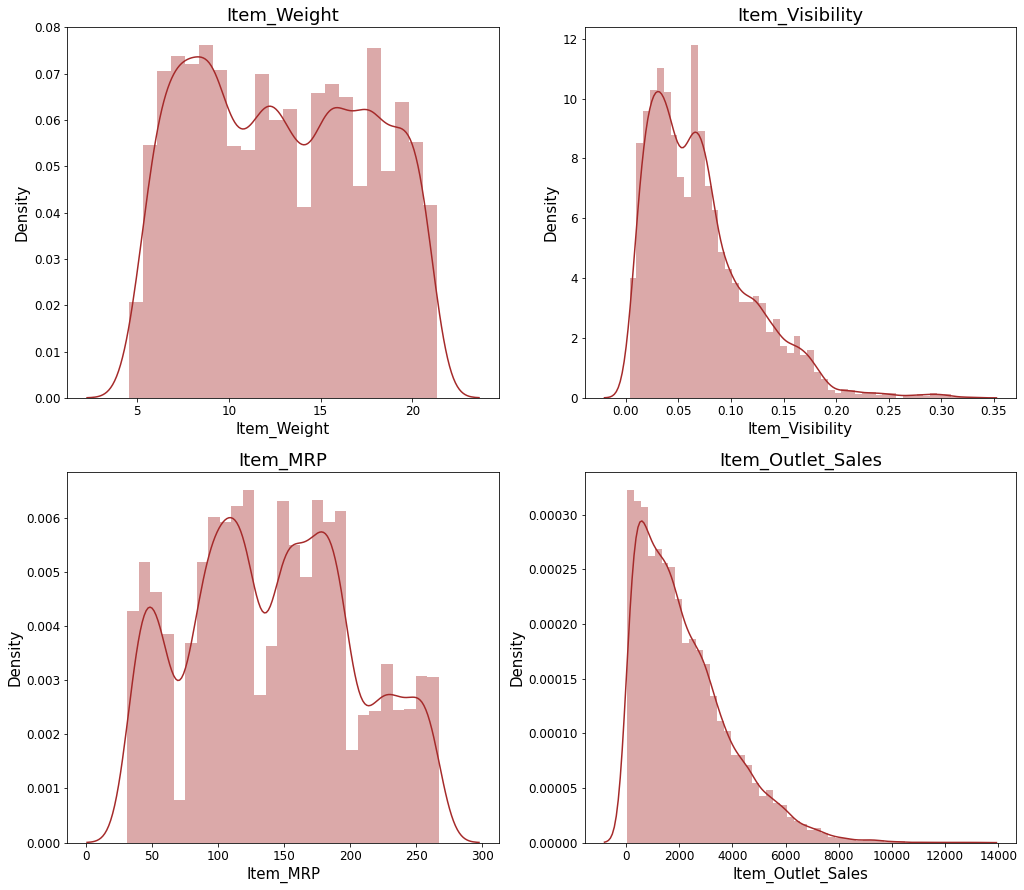

In [18]:
# visualizing distribution of data of all numerical features 
fig,ax = plt.subplots(figsize=(17,15))
c=1
for i in num:
    plt.subplot(2,2,c)
    sns.distplot(df[i],color='Brown')
    plt.title(i,fontsize=18)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Density',fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    c+=1

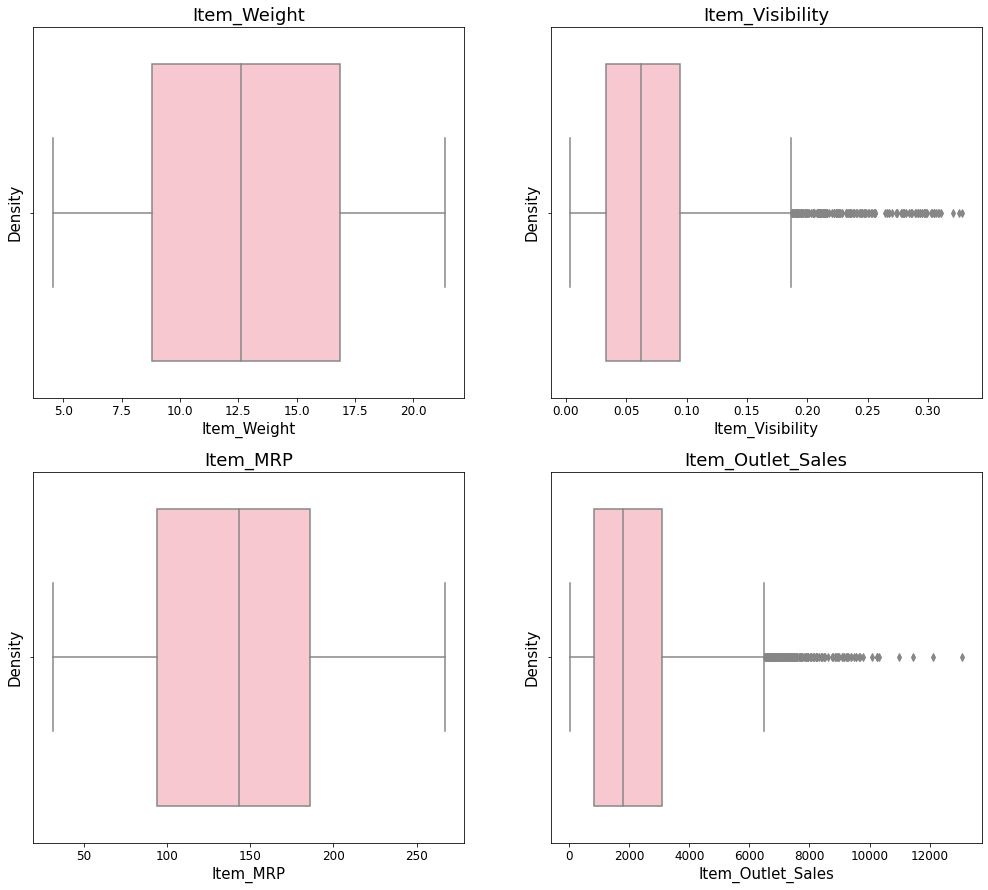

In [19]:
# visualizing distribution of data of all numerical features 
fig,ax = plt.subplots(figsize=(17,15))
c=1
for i in num:
    plt.subplot(2,2,c)
    sns.boxplot(df[i],color='pink')
    plt.title(i,fontsize=18)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Density',fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    c+=1

#### CONCLUSION :
1. Item weight have almost uniform distribution in data. Most of items fall in 7 to 9 category
2. Item visibility and item outlet sales have the right skewness in the data
3. item MRP can be divided into 4 categories according to price of an item such as cheap, moderate, expensive, very expensive

In [20]:
# creating list of object datatype columns
obj=[]
for i in df.select_dtypes('object').columns:
    obj.append(i)

# removing item type cause it contents more number of elements to visualize
obj.remove('Item_Type')

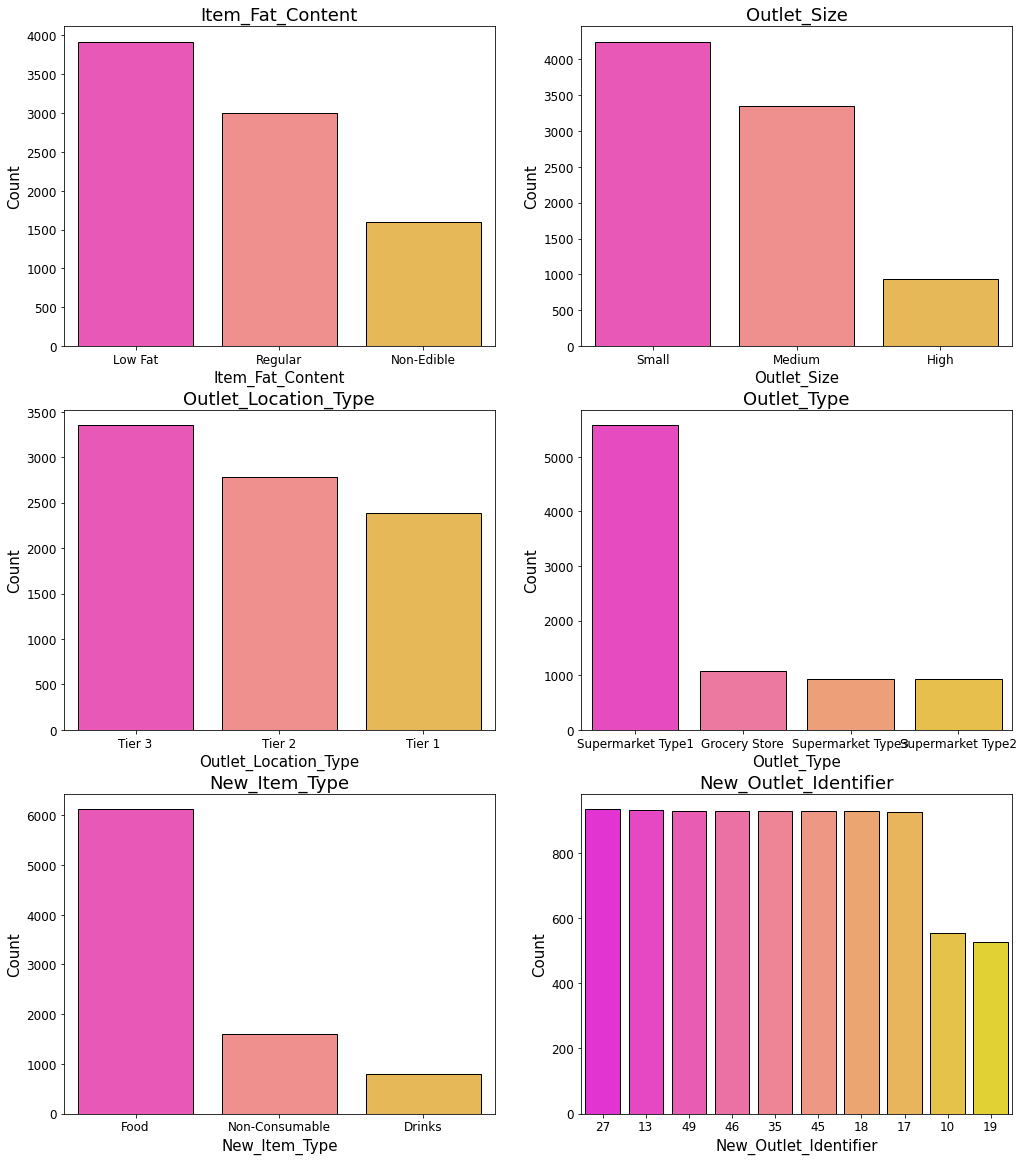

In [21]:
# visualizing count of data of all categorical features 
fig,ax = plt.subplots(figsize=(17,20))
c=1
for i in obj:
    plt.subplot(3,2,c)
    sns.countplot(df[i], order = df[i].value_counts().index, palette='spring', edgecolor='k')
    plt.title(i,fontsize=18)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    c+=1

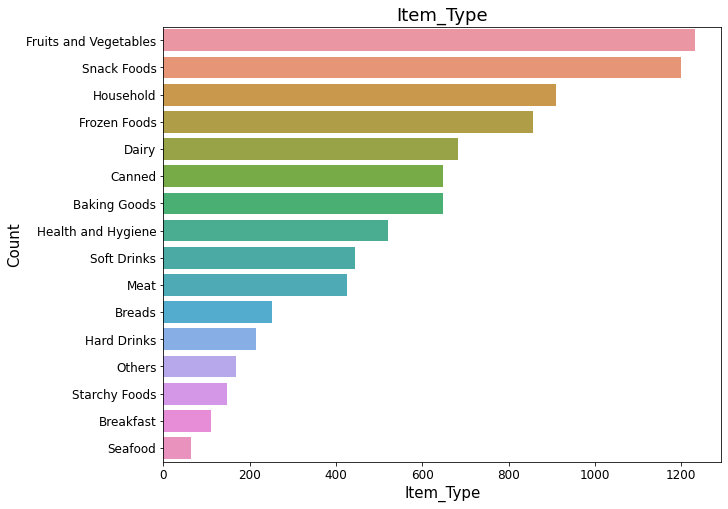

In [22]:
# visualizing count of data of all categorical features 
plt.figure(figsize=(10,8))
sns.countplot(y=df['Item_Type'], order = df['Item_Type'].value_counts().index)
plt.title('Item_Type',fontsize=18)
plt.xlabel('Item_Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

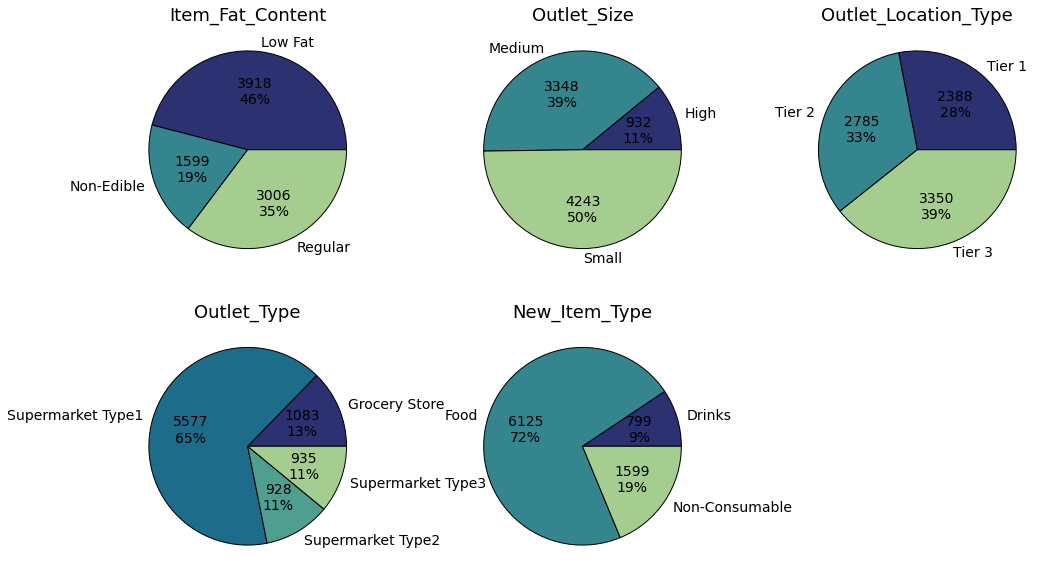

In [23]:
# removing item type cause it contents more number of elements to visualize
obj.remove('New_Outlet_Identifier')

# visualizing count of data of all categorical features 
fig,ax = plt.subplots(figsize=(17,10))

def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
c=1
for i in obj:
    plt.subplot(2,3,c)
    df.groupby(df[i]).size().plot(kind='pie',autopct=label_function, textprops={'fontsize': 14},cmap='crest_r',
                                  wedgeprops={"edgecolor":"black",'linewidth': 1, 'linestyle': 'solid'})
    plt.title(i,fontsize=18)
    plt.ylabel('')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    c+=1

#### CONCLUSION :
1. Most items sold are from food category which is around 72% and Least items sold are from drinks category which is only 9%. 
2. In food category Fruits and vegetables are sold most and seafoods are sold very least. 
3. Most sold products have low fat content which is around 46% of total items and least items are non edible which is around 19% only.
4. Most of the outlets are small in size i.e. around 50% of total outlets and least are high in size i.e. around 11% only.
5. All Outlets are almost equally distributed according to location. 
6. Supermarket Type 1 outlets are most which is around 65% of total outlets.

### Feature Engineering

In [24]:
# creating list of object datatype columns
obj=[]
for i in df.select_dtypes('object').columns:
    obj.append(i)

# converting non-numeric columns into categorical datatype column
for i in obj:
      df[i]=df[i].astype('category')
        
# checking datatypes of all columns after coverting datatype into categorical columns
print('Datatype of all columns in dataset:')
df.info()

Datatype of all columns in dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                8523 non-null   float64 
 1   Item_Fat_Content           8523 non-null   category
 2   Item_Visibility            8523 non-null   float64 
 3   Item_Type                  8523 non-null   category
 4   Item_MRP                   8523 non-null   float64 
 5   Outlet_Establishment_Year  8523 non-null   int64   
 6   Outlet_Size                8523 non-null   category
 7   Outlet_Location_Type       8523 non-null   category
 8   Outlet_Type                8523 non-null   category
 9   Item_Outlet_Sales          8523 non-null   float64 
 10  New_Item_Type              8523 non-null   category
 11  New_Outlet_Identifier      8523 non-null   category
dtypes: category(7), float64(4), int64(1)
memory usage: 459

In [26]:
# creating list of categorical datatype columns 
category=[]
for i in df.select_dtypes('category').columns:
      category.append(i)

# label encoder technique to convert categorical column to numerical type
for i in category:
      df[i+str('_encode')] = preprocessing.LabelEncoder().fit_transform(df[i])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,New_Outlet_Identifier,Item_Fat_Content_encode,Item_Type_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode,New_Item_Type_encode,New_Outlet_Identifier_encode
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,49,0,4,1,0,1,1,9
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,18,2,14,1,2,2,0,3
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,49,0,10,1,0,1,1,9
3,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,Food,10,2,6,1,2,0,1,0
4,8.93,Non-Edible,0.064299,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,13,1,9,0,2,1,2,1


In [27]:
# printing which label is assigned to which number 
for i in category:
    print(pd.DataFrame({str(i):df[i].unique(), i+str('_encode'):df[i+str('_encode')].unique()})
          .sort_values(i+str('_encode')))
    print('-'*50)

  Item_Fat_Content  Item_Fat_Content_encode
0          Low Fat                        0
2       Non-Edible                        1
1          Regular                        2
--------------------------------------------------
                Item_Type  Item_Type_encode
5            Baking Goods                 0
12                 Breads                 1
8               Breakfast                 2
11                 Canned                 3
0                   Dairy                 4
7            Frozen Foods                 5
3   Fruits and Vegetables                 6
10            Hard Drinks                 7
9      Health and Hygiene                 8
4               Household                 9
2                    Meat                10
14                 Others                11
15                Seafood                12
6             Snack Foods                13
1             Soft Drinks                14
13          Starchy Foods                15
-------------------------

### Feature Scaling

In [28]:
# feature scaling using minmax scaler
numerics = ['int64','float64','int32']   # datatype
df1 = df.select_dtypes(include=numerics)  
df_scaled=pd.DataFrame(MinMaxScaler().fit_transform(df1.to_numpy()),columns=df1.columns)  # using minmax scaler
print('Dataframe with minmax scaler values is as follows :')
df_scaled.head()   # preview of dataframe after scaling

Dataframe with minmax scaler values is as follows :


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_encode,Item_Type_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode,New_Item_Type_encode,New_Outlet_Identifier_encode
0,0.282525,0.038399,0.927507,0.583333,0.283587,0.0,0.266667,0.5,0.0,0.333333,0.5,1.000000
1,0.081274,0.048346,0.072068,1.000000,0.031419,1.0,0.933333,0.5,1.0,0.666667,0.0,0.333333
2,0.770765,0.040593,0.468288,0.583333,0.158115,0.0,0.666667,0.5,0.0,0.333333,0.5,1.000000
3,0.871986,0.218055,0.640093,0.541667,0.053555,1.0,0.400000,0.5,1.0,0.000000,0.5,0.000000
4,0.260494,0.186950,0.095805,0.083333,0.073651,0.5,0.600000,0.0,1.0,0.333333,1.0,0.111111


### Feature Selection

In [29]:
# correlation among numerical features
df_scaled.corr().style.background_gradient(cmap='afmhot')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_encode,Item_Type_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode,New_Item_Type_encode,New_Outlet_Identifier_encode
Item_Weight,1.000000,-0.018409,0.026172,-0.012823,0.013261,-0.004388,0.035973,-0.013371,0.002929,0.000298,0.071641,-0.007568
Item_Visibility,-0.018409,1.000000,-0.005861,-0.080598,-0.135247,0.022501,-0.036094,0.031617,-0.029109,-0.178473,-0.046757,-0.105722
Item_MRP,0.026172,-0.005861,1.000000,0.005020,0.567574,0.008594,0.032651,0.001215,0.000232,-0.001975,0.032517,0.003319
Outlet_Establishment_Year,-0.012823,-0.080598,0.005020,1.000000,-0.049135,0.001451,0.004970,0.428367,-0.089216,-0.122304,-0.008551,0.079035
Item_Outlet_Sales,0.013261,-0.135247,0.567574,-0.049135,1.000000,0.015249,0.017048,-0.060517,0.089367,0.401522,0.011236,0.162325
Item_Fat_Content_encode,-0.004388,0.022501,0.008594,0.001451,0.015249,1.000000,-0.066248,-0.002855,0.000958,0.000084,0.186485,-0.003433
Item_Type_encode,0.035973,-0.036094,0.032651,0.004970,0.017048,-0.066248,1.000000,-0.000394,0.003084,0.003053,0.007456,0.001656
Outlet_Size_encode,-0.013371,0.031617,0.001215,0.428367,-0.060517,-0.002855,-0.000394,1.000000,-0.590686,-0.260467,-0.003920,0.423653
Outlet_Location_Type_encode,0.002929,-0.029109,0.000232,-0.089216,0.089367,0.000958,0.003084,-0.590686,1.000000,0.467219,0.007661,-0.716176
Outlet_Type_encode,0.000298,-0.178473,-0.001975,-0.122304,0.401522,0.000084,0.003053,-0.260467,0.467219,1.000000,0.001136,0.099873


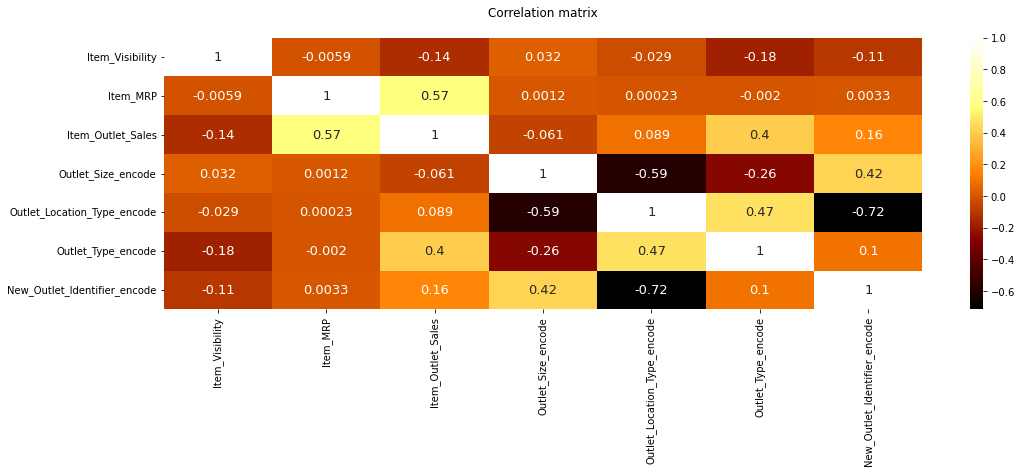

In [32]:
# Selecting Features having Correlation greater than 0.05
select = []
for i in df_scaled:
      if abs(df_scaled[i].corr(df_scaled['Item_Outlet_Sales']))>=0.05 :
            select.append(i)

# plotting heatmap among selected features
fig, ax = plt.subplots(figsize=(17,5)) 
ax =(sns.heatmap(df_scaled[select]
             .corr(), annot = True, cmap="afmhot",annot_kws={"size": 13})
.set(title = "Correlation matrix\n"))
plt.show()

In [33]:
# final dataset for model building
df_final = df_scaled[select]
df_final.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode,New_Outlet_Identifier_encode
0,0.038399,0.927507,0.283587,0.5,0.0,0.333333,1.000000
1,0.048346,0.072068,0.031419,0.5,1.0,0.666667,0.333333
2,0.040593,0.468288,0.158115,0.5,0.0,0.333333,1.000000
3,0.218055,0.640093,0.053555,0.5,1.0,0.000000,0.000000
4,0.186950,0.095805,0.073651,0.0,1.0,0.333333,0.111111


## Model Building

### Spliting Data into train and test 

In [66]:
# Creating test and training datasets
df_train, df_test = train_test_split(df_final,train_size = 0.8)

X_train = df_train.drop(columns='Item_Outlet_Sales', axis =1)
Y_train = df_train['Item_Outlet_Sales']
X_test = df_test.drop(columns='Item_Outlet_Sales', axis =1)
Y_test = df_test['Item_Outlet_Sales']

print('Size of training dataset from input data is', Y_train.shape[0])
print('Size of test dataset from input data is', Y_test.shape[0])

Size of training dataset from input data is 6818
Size of test dataset from input data is 1705


#### Using K-Fold cross validation method

In [67]:
# creating list
R2_Score, Mean_Squared_Error, Root_Mean_Squared_Error, Mean_Absolute_Error= list(), list(), list(), list()

# creating function to build model and to evaluate it
def MODEL(model, X, Y):
    cv = KFold(n_splits=10, shuffle=False, random_state=None)
    r2 = cross_val_score(model, X, Y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    mse = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    rmse = cross_val_score(model, X, Y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    mae = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    
    R2_Score.append(r2)
    Mean_Squared_Error.append(mse)
    Root_Mean_Squared_Error.append(rmse)
    Mean_Absolute_Error.append(mae)
    
    print('R2-Score: {} %'.format(abs(round((mean(r2)*100),2))))
    print('Mean Squared Error: {} %'.format(abs(round((mean(mse)*100),2))))
    print('Root Mean Squared Error: {} %'.format(abs(round((mean(rmse)*100),2))))
    print('Mean Absolute Error: {} %'.format(abs(round((mean(mae)*100),2))))

### Model 1 : Linear Regression Model

In [68]:
MODEL(LinearRegression(), X_train, Y_train)

R2-Score: 50.19 %
Mean Squared Error: 0.86 %
Root Mean Squared Error: 9.26 %
Mean Absolute Error: 6.99 %


### Model 2 : Decision Tree Regression Model

In [69]:
MODEL(DecisionTreeRegressor(), X_train, Y_train)

R2-Score: 19.1 %
Mean Squared Error: 1.39 %
Root Mean Squared Error: 11.75 %
Mean Absolute Error: 8.15 %


### Model 3:  K nearest Neighbour 

In [70]:
MODEL(KNeighborsRegressor(), X_train, Y_train)

R2-Score: 53.99 %
Mean Squared Error: 0.79 %
Root Mean Squared Error: 8.9 %
Mean Absolute Error: 6.24 %


### Evaluation of models

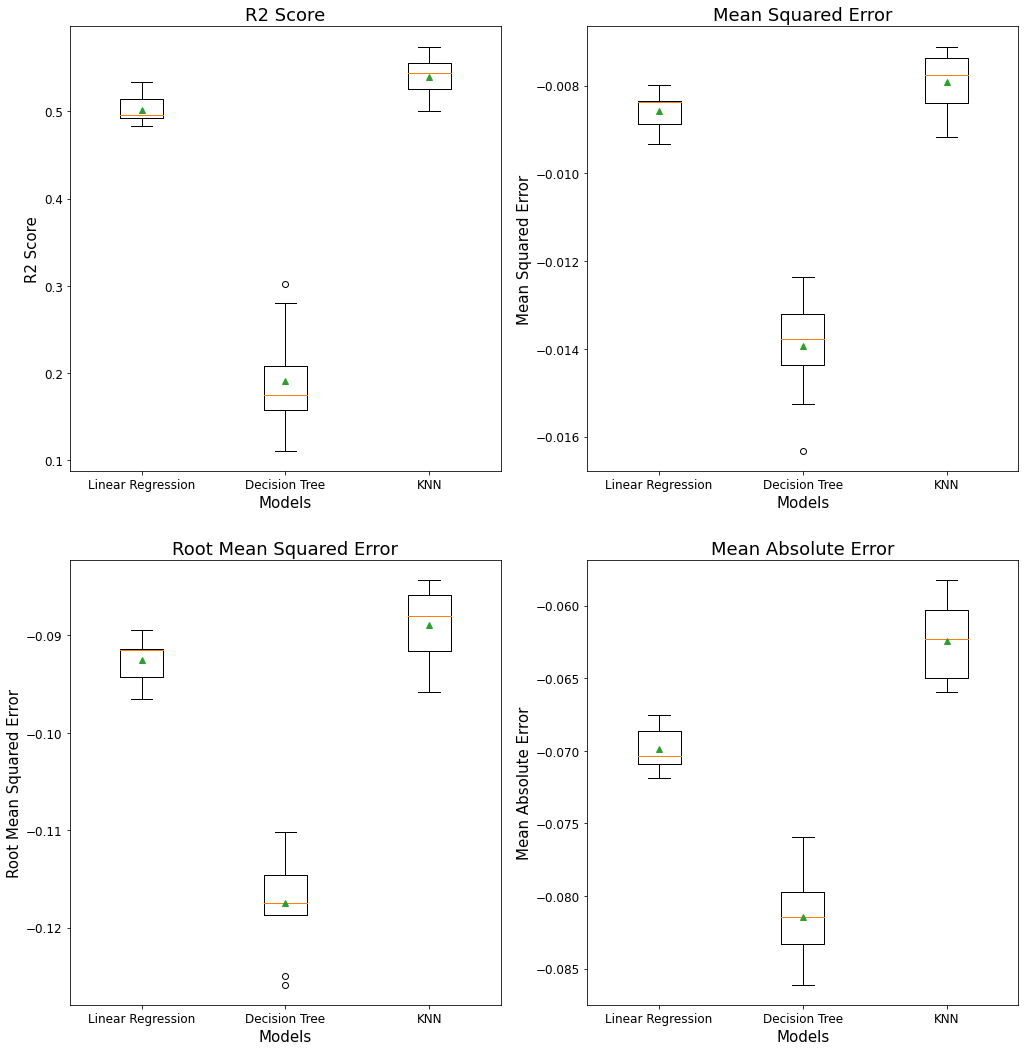

In [71]:
# creating list to help in visualization of model evaluation score
names=['Linear Regression','Decision Tree','KNN']
results = [R2_Score, Mean_Squared_Error, Root_Mean_Squared_Error, Mean_Absolute_Error]
scores=['R2 Score','Mean Squared Error','Root Mean Squared Error','Mean Absolute Error']

# visualizing count of data of all categorical features 
fig,ax = plt.subplots(figsize=(17,18))
c=1
for i in range(len(results)):
    plt.subplot(2,2,c)
    plt.boxplot(results[i], labels=names, showmeans=True)
    plt.xlabel('Models', fontsize = 15)
    plt.ylabel(scores[i], fontsize = 15)
    plt.title(scores[i], fontsize = 18)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    c+=1

### CONCLUSION :
1. Among all models 'KNN model' gives the best performance.  
   
R2-Score: 53.38 %

Mean Squared Error: 0.8 %

Root Mean Squared Error: 8.94 %

Mean Absolute Error: 6.25 %

###   KNN model

##### A. Training model

In [72]:
#import required packages
from sklearn import neighbors
from math import sqrt

In [73]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.11121243847754313
RMSE value for k=  2 is: 0.10055652383001985
RMSE value for k=  3 is: 0.09449240898413627
RMSE value for k=  4 is: 0.09121894950575792
RMSE value for k=  5 is: 0.08877826473805961
RMSE value for k=  6 is: 0.08757382025607403
RMSE value for k=  7 is: 0.08656961526489557
RMSE value for k=  8 is: 0.08627474324491959
RMSE value for k=  9 is: 0.08622314511524094
RMSE value for k=  10 is: 0.08592705849724958
RMSE value for k=  11 is: 0.08558265669700443
RMSE value for k=  12 is: 0.08513715064553458
RMSE value for k=  13 is: 0.08488051906573005
RMSE value for k=  14 is: 0.08448413757148548
RMSE value for k=  15 is: 0.08415897778759637
RMSE value for k=  16 is: 0.08390367544600845
RMSE value for k=  17 is: 0.08357802612297936
RMSE value for k=  18 is: 0.08331266387401795
RMSE value for k=  19 is: 0.08309942968178398
RMSE value for k=  20 is: 0.0825612323771961


<AxesSubplot:>

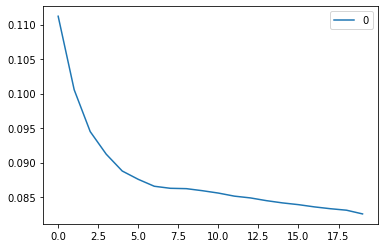

In [74]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [75]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 9}

In [76]:
model = neighbors.KNeighborsRegressor(n_neighbors = 9)
model.fit(X_train, Y_train)  #fit the model


KNeighborsRegressor(n_neighbors=9)

##### c. Predicting values

In [77]:
pred=model.predict(X_test) #make prediction on test set
pred

array([0.29265418, 0.01867342, 0.2074535 , ..., 0.37096354, 0.19276979,
       0.04942365])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [79]:
print("mean_squared_error ",mean_squared_error(Y_test,pred, squared=True))#mse value
print("Root mean_squared_error ",mean_squared_error(Y_test,pred, squared=False) )#rmse value
print("mean_absolute_error ",mean_absolute_error(Y_test,pred))
print("r2_score",r2_score(Y_test,pred))

mean_squared_error  0.007434430753563898
Root mean_squared_error  0.08622314511524094
mean_absolute_error  0.05999415929457096
r2_score 0.5493841132912879


##### d. Plotting actual and predicted values of first 50 datapoints

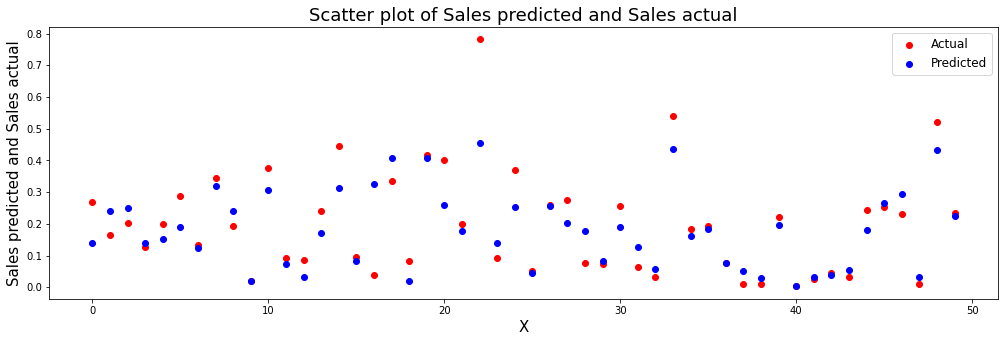

In [64]:
# plotting actual and pred values of first 50 datapoints 
x_1 = list(np.arange(0,len(Y_test.iloc[:50])))
plt.figure(figsize=(17,5))
plt.scatter(x_1,Y_test.iloc[:50],color='red')
plt.scatter(x_1,pd.Series(pred).iloc[:50],color='blue')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Sales predicted and Sales actual' , fontsize = 15)
plt.legend(['Actual','Predicted'],loc="upper right",fontsize = 12)
plt.title('Scatter plot of Sales predicted and Sales actual', fontsize = 18);

### Thank you